# Model Evaluation Metrics

## Evaluation of regression model

Some methods we already know:

* MSE - Mean Squared Error:
$$ \frac {1}{n} \sum_{i=1}^{n} (y_i^* - y_i)^2 $$

* RMSE - Root Mean Squared Error: 
$$ \sqrt {\frac {1}{n} \sum_{i=1}^{n} (y_i^* - y_i)^2} $$

* MAE - Mean Absolute Error:
$$ \frac {1}{n} \sum_{i=1}^{n} \lvert y_i^* - y_i \rvert $$  

* $R^2$ - 
$$ R^2 = 1 - \frac {\sum_{i=1}^{n}(y_i - y^*_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} $$ 


In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print('MSE: {}'.format(mean_squared_error(y_true, y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
print('MAE: {}'.format(mean_absolute_error(y_true, y_pred)))
print('R^e: {}'.format(r2_score(y_true, y_pred)))

MSE: 0.375
RMSE: 0.6123724356957945
MAE: 0.5
R^e: 0.9486081370449679


## Evaluation of classification model

Confusion matrix - two dimensional matrix. $C_{ij}$ - number of elements that belongs to $i$ class but model predicted class $j$ so on diagonal we have correctly classified elements:  
![picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)


Most common metrics are: Accuracy, Precision, Recall, F1 score

* Accuracy - we should use this metric for balanced datasets.
$$Accuracy = (TP + TN)/( TP + FP + FN + TN)$$


* Precision - what part of predicted positive classes are actually positive? We should use this metric if we want to make sure that most of positive predictions are correct.
$$Precision = (TP)/(TP+FP)$$

* Recall - what part of actual positive records is guessed as positive by model?
$$Recall = (TP)/(TP+FN)$$

* F1 score - If model always predicts positive class than our Recall is $1$ and we need to find balance between precision and recall and here we have F1 score, this is some number in range $0$ - $1$ and we can calculate it like this:
$$ F_1 = 2* \frac {Precision * Recall}{Precision + Recall}$$
If none of predictions are correct $F_1 = 1$. 

Accuracy using confusion matrix for multiclass classification:
$$ Accuracy =  \frac {\sum_{i=1}^{N} C_{ii} }{ \sum_{i=1}^{N} \sum_{j=1}^{N} C_{ij} } $$

Precision, Recall, F1 score for multiclass classification using sklearn:
* `'micro'`: ealuates global metric on whole matrix. It calculates true positives, false negatives and false positives .
* `'macro'`: evaluates metric seperately for each class and returns average(not weighted). it doesn't take in consideration unbalance of elements.
* `'weighted'`: evaluates metric seperately for each class and returns weighted average. It takes in consideration unbalance of elements
* `'samples'`: evaluates metric for each sample and finds its average(it is meaningless for binary classification).

Precision and Recall of $i$th class from confusion matrix elements:

$$ Precision_i =  \frac {C_{ii} }{ \sum_{j=1}^{N} C_{ji} } $$
$$ Recall_i =  \frac {C_{ii} }{ \sum_{j=1}^{N} C_{ij} } $$

Precision, Recall, Acuracy and F1 score aren't used as cost functions. We can use Binary Crossentropy or Categorical Crossentropy as cost functions. Both functions take into account both - the model's responses as well as how confident the model was in the response received. 

* Log Loss/Binary Crossentropy is used for binary classification like logistic regression and also is used for neural networks: 
$$ \sum_{i=1}^{n} -(y_i \log(p_i) + (1-y_i) \log(1-p_i))  $$ 
$y$ - actual value, $p$ - probability that models result is $1$. 

![image](https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png)


* Categorical Crossentropy - used for multiclass classification:
$$ -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{K} y_{ij} \log(p_{ij})$$
$n$ - number of samples, $K$ - number of classes. $y_{ij}$ = $1$ if $i$th element belongs to $j$ class, else it's $0$. $p_{ij}$ - probability that $i$ element will be predicted as part of class $j$.

> Binary and Categorical Crossentropy have bad results for unbalanced data. We can fix this by assigning some weights to classes

* AUC - Area Under ROC(Receiver Operating Characteristics) Curve is used to estimated how well model can seperate classes from each other. We should plot True Positive Rate versus False Positive Rate to get ROC curve

$$ TPR = Recall = TP/(TP+FN)$$
$$ FPR = FP/(FP+TN)$$ 

AUC for perfect model is $1$.

![picture](https://miro.medium.com/max/361/1*pk05QGzoWhCgRiiFbz-oKQ.png)

Green line is ROC curve. to plot this curve we should consider some different values of threshold from $0$ to $1$ and for each threshold value we should calculate TPR and FPR.

threshold = $0$ means that we consider any result of model as positive so $FN = TN = 0$ and $TPR = FPR = 1$ (upper right corner of graph)

threshold = $1$ means that we consider any result of model as negative so $TP = FP = 0$ და $TPR = FPR = 0$ (lower left corner of graph)

area under ROC curve = AUC


train iris dataset using SVM and look at different metrics(Accuracy, Precision, Recall, F1 score, AUC  and confusion matrix)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix

y_pred = classifier.predict(X_test)

print('precision: {}'.format(precision_score(y_test, y_pred, average='macro')))
print('recall: {}'.format(recall_score(y_test, y_pred, average='macro')))
print('f1 score: {}'.format(f1_score(y_test, y_pred, average='macro')))

precision: 0.8666666666666667
recall: 0.875
f1 score: 0.8397435897435898


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


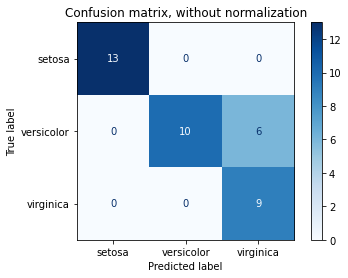

In [4]:
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


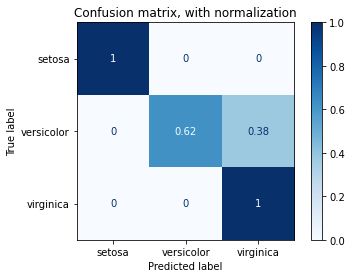

In [5]:
disp = plot_confusion_matrix(classifier, X_test, y_test,  display_labels=class_names, cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title("Confusion matrix, with normalization")
plt.show()

ROC AUC 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


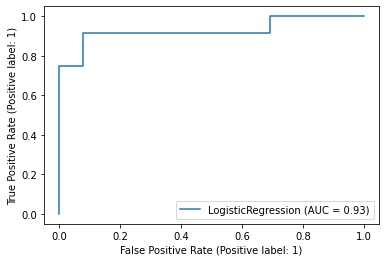

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

# create dataset for binary classification
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

plot_roc_curve(clf, X_test, y_test)  # ROC AUC visualization
plt.show() 

# Dimensionality Reduction 

Machine learning works good if we have a big dataset. We can get better models with bigger dataset but this may not be truth if we increase number of features.

Increasing number of features causes increase of evaluation time but also may cause dicrease in model accuracy.

To solve this problem people created some dimensionality reduction techniques that tries to dicrease number of features in such way that model accuracy stays the same(or slightly dicreases).

Principal Component Analysis(PCA) is the most common used dimensionality reduction technique. It transforms features into a smaller number of features that still contain most of the information.

Reducing the number of features can be done at the expense of model accuracy, however, the purpose of reducing the dimension is to simplify the data so that the accuracy of the algorithms is as slightly dicreased as possible. Advantages:

* using small number of features makes model training process much faster
* mostly we get $2$ or $3$ dimension after using suc techniques and visualization becomes too easy.

PCA has this steps:
    Standartization of data
    Calculate covariance matrix
    Calculate eigenvectors and eigenvalues
    Define principal components
    Reduce the data dimension

Let's implement PCA without libraries:

In [7]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Rango/data/winequality_cleaned.csv')
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
1,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
2,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
3,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
4,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [9]:
X = df.drop('type', axis =1)
Y = df['type']

## Standartization

If we don't use standartization, some parameters that have much bigger values will have higher impact than others.

In [10]:
from sklearn.preprocessing import StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_std.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.738644,-0.206615,0.210014,-0.800818,-0.131284,-0.985854,0.293747,-0.107491,0.489730,-0.243479,-0.905396
1,0.943084,-0.340328,0.656947,0.434354,-0.085164,-0.009734,-0.348759,0.286477,0.227656,-0.635736,-0.399850
2,0.102220,-0.674613,0.061036,0.807236,0.283802,1.027394,1.285042,0.465554,-0.230973,-0.949541,-0.568365
3,-0.832073,-0.072901,-1.130788,0.457659,-0.315767,-0.009734,0.367176,0.214846,-0.296492,-0.400382,-0.821138
4,0.943084,-0.741469,0.880414,-0.824123,-0.361888,-0.131749,0.238675,-0.179122,-0.034418,-0.557285,0.358468


## Covariant matrix

Covariation shows us how two variables changes are depend on each other. If they change on the same direction so they are proportional than covariation is positiv, else - negative. If there is not any dependency, covariation is 0.

Covariance can take on any numerical value, depending on the mean of data and some other statistical parameters.In order to be able to compare covariances with each other it is necessary to standardize the variables. If we calculate the covariance of two standardized variables, we get a correlation that is already familiar to us, which varies between $ [- 1, 1] $, and we can already clearly compare them with each other.

When the correlation of two standardized features is very close to each other, it means that they behave almost identically. The presence of many such features worsens the model results and it is therefore necessary to find strongly interdependent parameters.

covariance:
$$ Cov(x,y) = \frac {1} {N-1} \sum_{i=1}^{N} (x_i - \mu_x)*(y_i - \mu_y) $$ 
$N$ - number of samples, $ \mu_x $ and $ \mu_y $ - mean values

[difference between covariance and correlation](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22)



In [11]:
import numpy as np

#covariance matrix
cov_mat = (X_std).T.dot(X_std) / (X_std.shape[0]-1)

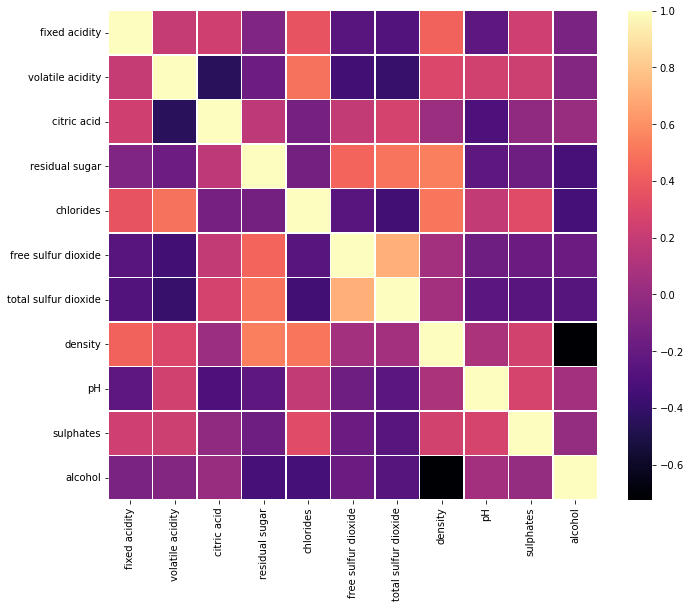

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(cov_mat, cmap='magma', square=True, linewidths=.5, )

## Eigenvectors and eigenvalues

In [13]:
cov_mat = np.cov(X_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('shape of eigenvalues {}'.format(eig_vals.shape))
print('shape of eigenvectors {}'.format(eig_vecs.shape))

shape of eigenvalues (11,)
shape of eigenvectors (11, 11)


## Define principal components

Principal components are new features that we get from previous features combinations. This new features are indipendent from each other. New features has almost the same information.

To get the principal components we must first sort our eigenvectors according to our eigenvalues. The greater its eigenvalue, the more important its eigenvector.

After sorting we have to choose how many attributes ($m$) we want to have in the new dataset. Compose a matrix with its eigenvector of the largest $m$ value.
We need to multiply the original dataset by this matrix, resulting in a new dataset containing only $m$ features.

E.g. Suppose the original dataset consisted of a $1000$ record and each record had a $15$ feature, i.e. the dataset form was $(1000,15)$. We calculated our eigenvectors (the size of the vectors is $(15,)$) and our eigenvalues ​​and decided to leave only $5$ of them. The selected matrix consisting of its eigenvectors will have a dimension of $(15,5)$.
When we multiply a dataset by our eigenvector matrix $(1000,15)\times(15,5)$ we get a matrix of $(1000,5)$, i.e. the number of attributes is reduced to $5$.


In [14]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print('eigenvalues descending order:')
for i in eig_pairs:
    print(i[0])

eigenvalues descending order:
3.150677470277583
2.5303466151230647
1.501200184339309
0.028750359096487352
0.9947077728946718
0.23183003844424901
0.35406135753344925
0.41579999793252664
0.5126796171123177
0.6596130982393995
0.6225797622354476


In fact this chosen vectors are orthogonal to each other and these are new axes where we're doing projection

## Dimensionality Reduction

Let's choose first $5$ eigenvectors, create a matrix using them and reduce the dimension

In [15]:
matrix = np.array([vec[1] for vec in eig_pairs[:5]]).T
print('matrix dimension: ', matrix.shape)
matrix

matrix dimension:  (11, 5)


array([[ 2.22926705e-01,  2.42219746e-01, -5.67819176e-01,
        -2.82933499e-01,  7.90194389e-02],
       [ 3.98918036e-01,  1.07800924e-01,  2.14017454e-01,
        -7.40760738e-02,  2.74454278e-01],
       [-2.27312770e-01,  9.80405267e-02, -5.55657800e-01,
        -3.96480126e-03, -3.50468299e-01],
       [-2.85418335e-01,  3.85090339e-01,  1.19302713e-01,
        -4.26046163e-01,  8.06885462e-02],
       [ 3.73778578e-01,  2.93535235e-01, -9.57144574e-03,
        -9.40684403e-02,  4.78297543e-04],
       [-4.03153330e-01,  1.74913833e-01,  1.91920026e-01,
        -4.53864439e-03, -2.01983845e-01],
       [-4.49918008e-01,  1.89516468e-01,  1.51856294e-01,
         6.06159633e-02, -1.14312660e-01],
       [ 1.28792354e-01,  5.88952225e-01,  4.76931486e-02,
         7.38514131e-01, -2.78903750e-02],
       [ 2.41453758e-01, -7.67442474e-02,  4.66822608e-01,
        -1.92034100e-01, -4.86763049e-01],
       [ 2.79847110e-01,  1.08522706e-01, -6.66605650e-02,
        -8.09173650e-02

To get a new dataset let's take a product of standardized dataset and eigenvectors matrix

In [16]:
X_PCA = np.dot(X_std, matrix)
print('dimension of new dataset: ', X_PCA.shape)

dimension of new dataset:  (4898, 5)


## Training and visualization

Let's train some different logistic regression models using PCA

In [17]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)

X_PCA = pca.fit_transform(X_std)
print('dimension of new dataset: ', X_PCA.shape)

dimension of new dataset:  (4898, 3)


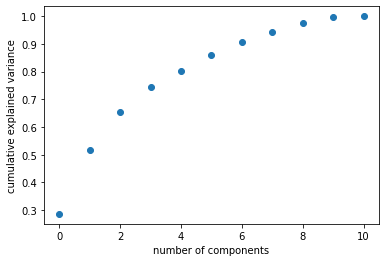

In [18]:
pca_all = PCA().fit(X_std) 
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), 'o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y , test_size=0.3, random_state=0)

lreg = LogisticRegression(random_state=0)
lreg.fit(X_train, y_train)
print('Train accuracy: ', lreg.score(X_train, y_train))
print('Test accuracy: ', lreg.score(X_test, y_test))

Train accuracy:  0.985414235705951
Test accuracy:  0.9809523809523809


Let's train model before PCA and check it's accuracy:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y , test_size=0.3, random_state=0)

lreg_std = LogisticRegression(random_state=0)
lreg_std.fit(X_train, y_train)
print('Train accuracy: ', lreg_std.score(X_train, y_train))
print('Test accuracy: ', lreg_std.score(X_test, y_test))
base_train = lreg_std.score(X_train, y_train)
base_test = lreg_std.score(X_test, y_test)

Train accuracy:  0.9962077012835473
Test accuracy:  0.9938775510204082


Plot a graph of how the accuracy of training and test sets depends on the number of dimensions

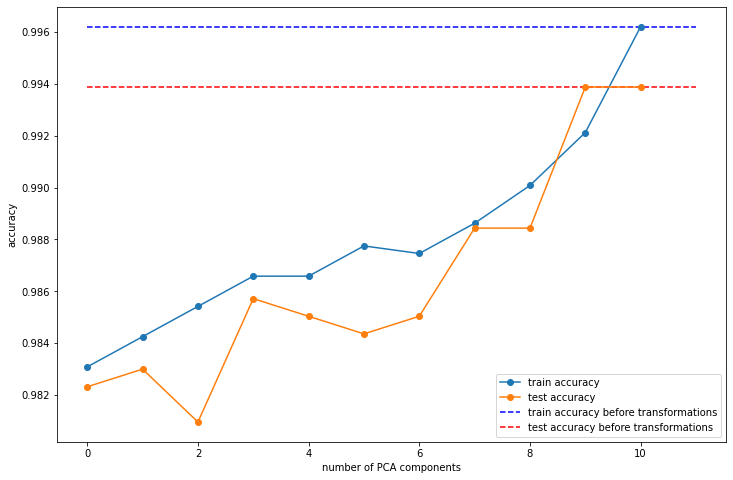

In [21]:
Train_results = []
Test_results = []

parameter_count = len(X.columns)

for i in range(1, parameter_count+1):
    X_PCA = PCA(n_components=i).fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y , test_size=0.3, random_state=0)

    lreg = LogisticRegression(random_state=0)
    lreg.fit(X_train, y_train)
    Train_results.append(lreg.score(X_train, y_train))
    Test_results.append(lreg.score(X_test, y_test))


plt.figure(figsize=(12,8))
plt.plot(Train_results, '-o', label='train accuracy')
plt.plot(Test_results, '-o', label='test accuracy')
plt.hlines(base_train, 0, parameter_count, 'blue', linestyles='dashed', label='train accuracy before transformations')
plt.hlines(base_test, 0, parameter_count, 'red', linestyles='dashed', label='test accuracy before transformations')
plt.xlabel('number of PCA components')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.show()

As can be seen from the graph, even one parameter gives us $98\%$ accuracy, which is a very high result.

This graph proves that even with a small number of parameters it is possible to get almost the same result. Moreover, in some cases, PCA conversion can even improve accuracy.